In [1]:

import sys
sys.path.insert(1,"/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages") #work around for h5py
from cbrain.imports import *
from cbrain.cam_constants import *
from cbrain.utils import *
from cbrain.layers import *
from cbrain.data_generator import DataGenerator
import tensorflow as tf
import tensorflow.math as tfm
# import tensorflow_probability as tfp
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import xarray as xr
import numpy as np
from cbrain.model_diagnostics import ModelDiagnostics
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as imag
import scipy.integrate as sin
# import cartopy.crs as ccrs
import matplotlib.ticker as mticker
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pickle


/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

In [2]:
cd ../../

/home1/07064/tg863631/CBrain_project/CBRAIN-CAM


## Pre-process data for the experiment

### Specific humidity, norm file for (-4K)

In [4]:
!python preprocessing-11132019.py -c /home1/07064/tg863631/CBrain_project/PrepData/CI_SP_M4K_NORM.yml

/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

### Specific humidity, training and validation for (-4K)

In [ ]:
!python preprocessing-11132019.py -c /home1/07064/tg863631/CBrain_project/PrepData/CI_SP_M4K.yml

/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

### Specific humidity, training and validation for (-4K) -- need to do validation as it was left 

In [4]:
!python preprocessing-11132019.py -c /home1/07064/tg863631/CBrain_project/PrepData/CI_SP_M4K.yml

/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

In [2]:
cd ../../

/home1/07064/tg863631/CBrain_project/CBRAIN-CAM


### Specific humidity, norm file for (+4K)

In [5]:
!python preprocessing-11132019.py -c /home1/07064/tg863631/CBrain_project/PrepData/CI_SP_P4K_NORM.yml

/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

### Specific humidity, training and validation for (+4K)

In [3]:
!python preprocessing-11132019.py -c /home1/07064/tg863631/CBrain_project/PrepData/CI_SP_P4K.yml

/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

### Relative humidity, norm file for (-4K)

In [6]:
!python preprocessing-11132019.py -c /home1/07064/tg863631/CBrain_project/PrepData/CI_RH_M4K_NORM.yml

/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n


## Build and train models on (-4K) with and without the first input rescaling

### Generator using specific humidity inputs at (-4K)

In [2]:
scale_dict = load_pickle('/home1/07064/tg863631/CBrain_project/CBRAIN-CAM/nn_config/scale_dicts/009_Wm2_scaling.pkl')

In [3]:
in_vars = ['QBP','TBP','PS', 'SOLIN', 'SHFLX', 'LHFLX']
out_vars = ['PHQ','TPHYSTND','FSNT', 'FSNS', 'FLNT', 'FLNS']

In [2]:
TRAINDIR = '/scratch/07064/tg863631/PrepData/'
TRAINFILE = 'CI_SP_M4K_train_shuffle.nc'
NORMFILE = 'CI_SP_M4K_NORM_norm.nc'
VALIDFILE = 'CI_SP_M4K_valid.nc'

In [5]:

train_gen = DataGenerator(
    data_fn = TRAINDIR+TRAINFILE,
    input_vars = in_vars,
    output_vars = out_vars,
    norm_fn = TRAINDIR+NORMFILE,
    input_transform = ('mean', 'maxrs'),
    output_transform = scale_dict,
    batch_size=1024,
    shuffle=True
)

In [6]:
valid_gen = DataGenerator(
    data_fn = TRAINDIR+VALIDFILE,
    input_vars = in_vars,
    output_vars = out_vars,
    norm_fn = TRAINDIR+NORMFILE,
    input_transform = ('mean', 'maxrs'),
    output_transform = scale_dict,
    batch_size=1024,
    shuffle=True
)

In [7]:
print(valid_gen[50][0].shape)
print(train_gen[50][1].shape)
print(valid_gen[78][0].shape)
print(valid_gen[78][1].shape)

(1024, 64)
(1024, 64)
(1024, 64)
(1024, 64)


### Generator using relative humidity inputs

In [8]:
scale_dict_RH = load_pickle('/home1/07064/tg863631/CBrain_project/CBRAIN-CAM/nn_config/scale_dicts/009_Wm2_scaling.pkl')

In [9]:
scale_dict_RH['RH'] = 0.01*L_S/G, # Arbitrary 0.1 factor as specific humidity is generally below 2%


In [10]:
in_vars_RH = ['RH','TBP','PS', 'SOLIN', 'SHFLX', 'LHFLX']
out_vars_RH = ['PHQ','TPHYSTND','FSNT', 'FSNS', 'FLNT', 'FLNS']

In [11]:
TRAINFILE_RH = 'CI_RH_M4K_NORM_train_shuffle.nc'
NORMFILE_RH = 'CI_RH_M4K_NORM_norm.nc'
VALIDFILE_RH = 'CI_RH_M4K_NORM_valid.nc'

In [22]:
train_gen_RH = DataGenerator(
    data_fn = TRAINDIR+TRAINFILE_RH,
    input_vars = in_vars_RH,
    output_vars = out_vars_RH,
    norm_fn = TRAINDIR+NORMFILE_RH,
    input_transform = ('mean', 'maxrs'),
    output_transform = scale_dict_RH,
    batch_size=1024,
    shuffle=True
)

In [23]:
print(train_gen_RH[50][0].shape)
print(train_gen_RH[50][1].shape)
print(train_gen_RH[78][0].shape)
print(train_gen_RH[78][1].shape)

(1024, 64)
(1024, 64)
(1024, 64)
(1024, 64)


### Build "brute-force" model

In [14]:
inp = Input(shape=(64,))
densout = Dense(128, activation='linear')(inp)
densout = LeakyReLU(alpha=0.3)(densout)
for i in range (6):
    densout = Dense(128, activation='linear')(densout)
    densout = LeakyReLU(alpha=0.3)(densout)
out = Dense(64, activation='linear')(densout)
Brute_force = tf.keras.models.Model(inp, out)

In [15]:
Brute_force.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 128)               0         
__________

### Build model converting specific humidity to relative humidity as inputs

In [16]:
# Moist thermodynamics library adapted to tf
def eliq(T):
    a_liq = np.float32(np.array([-0.976195544e-15,-0.952447341e-13,\
                                 0.640689451e-10,\
                      0.206739458e-7,0.302950461e-5,0.264847430e-3,\
                      0.142986287e-1,0.443987641,6.11239921]));
    c_liq = np.float32(-80.0)
    T0 = np.float32(273.16)
    return np.float32(100.0)*tfm.polyval(a_liq,tfm.maximum(c_liq,T-T0))

def eice(T):
    a_ice = np.float32(np.array([0.252751365e-14,0.146898966e-11,0.385852041e-9,\
                      0.602588177e-7,0.615021634e-5,0.420895665e-3,\
                      0.188439774e-1,0.503160820,6.11147274]));
    c_ice = np.float32(np.array([273.15,185,-100,0.00763685,0.000151069,7.48215e-07]))
    T0 = np.float32(273.16)
    return tf.where(T>c_ice[0],eliq(T),\
                   tf.where(T<=c_ice[1],np.float32(100.0)*(c_ice[3]+tfm.maximum(c_ice[2],T-T0)*\
                   (c_ice[4]+tfm.maximum(c_ice[2],T-T0)*c_ice[5])),\
                           np.float32(100.0)*tfm.polyval(a_ice,T-T0)))

def esat(T):
    T0 = np.float32(273.16)
    T00 = np.float32(253.16)
    omtmp = (T-T00)/(T0-T00)
    omega = tfm.maximum(np.float32(0.0),tfm.minimum(np.float32(1.0),omtmp))

    return tf.where(T>T0,eliq(T),tf.where(T<T00,eice(T),(omega*eliq(T)+(1-omega)*eice(T))))

def qv(T,RH,P0,PS,hyam,hybm):
    
    R = np.float32(287.0)
    Rv = np.float32(461.0)
    p = P0 * hyam + PS[:, None] * hybm # Total pressure (Pa)
    
    T = tf.cast(T,tf.float32)
    RH = tf.cast(RH,tf.float32)
    p = tf.cast(p,tf.float32)
    
    return R*esat(T)*RH/(Rv*p)
    # DEBUG 1
    # return esat(T)
    
def RH(T,qv,P0,PS,hyam,hybm):
    R = np.float32(287.0)
    Rv = np.float32(461.0)
    p = P0 * hyam + PS[:, None] * hybm # Total pressure (Pa)
    
    T = tf.cast(T,tf.float32)
    qv = tf.cast(qv,tf.float32)
    p = tf.cast(p,tf.float32)
    
    return Rv*p*qv/(R*esat(T))

In [17]:
class QV2RH(Layer):
    def __init__(self, inp_subQ, inp_divQ, inp_subRH, inp_divRH, hyam, hybm, **kwargs):
        """
        Call using ([input])
        Assumes
        prior: [QBP, 
        TBP, PS, SOLIN, SHFLX, LHFLX]
        Returns
        post(erior): [RHBP,
        TBP, PS, SOLIN, SHFLX, LHFLX]
        Arguments:
        inp_subQ = Normalization based on input with specific humidity (subtraction constant)
        inp_divQ = Normalization based on input with specific humidity (division constant)
        int_subRH = Normalization based on input with relative humidity (subtraction constant)
        inp_divRH = Normalization based on input with relative humidity (division constant)
        hyam = Constant a for pressure based on mid-levels
        hybm = Constant b for pressure based on mid-levels
        """
        self.inp_subQ, self.inp_divQ, self.inp_subRH, self.inp_divRH, self.hyam, self.hybm = \
            np.array(inp_subQ), np.array(inp_divQ), np.array(inp_subRH), np.array(inp_divRH), \
        np.array(hyam), np.array(hybm)
        # Define variable indices here
        # Input
        self.QBP_idx = slice(0,30)
        self.TBP_idx = slice(30,60)
        self.PS_idx = 60
        self.SHFLX_idx = 62
        self.LHFLX_idx = 63

        super().__init__(**kwargs)

    def build(self, input_shape):
        super().build(input_shape)

    def get_config(self):
        config = {'inp_subQ': list(self.inp_subQ), 'inp_divQ': list(self.inp_divQ),
                  'inp_subRH': list(self.inp_subRH), 'inp_divRH': list(self.inp_divRH),
                  'hyam': list(self.hyam),'hybm': list(self.hybm)}
        base_config = super().get_config()
        return dict(list(base_config.items()) + list(config.items()))
    
    def call(self, arrs):
        prior = arrs
        
        Tprior = prior[:,self.TBP_idx]*self.inp_divQ[self.TBP_idx]+self.inp_subQ[self.TBP_idx]
        qvprior = prior[:,self.QBP_idx]*self.inp_divQ[self.QBP_idx]+self.inp_subQ[self.QBP_idx]
        PSprior = prior[:,self.PS_idx]*self.inp_divQ[self.PS_idx]+self.inp_subQ[self.PS_idx]
        RHprior = (RH(Tprior,qvprior,P0,PSprior,self.hyam,self.hybm)-\
                    self.inp_subRH[self.QBP_idx])/self.inp_divRH[self.QBP_idx]
        
        post = tf.concat([tf.cast(RHprior,tf.float32),prior[:,30:]], axis=1)
        
        return post

    def compute_output_shape(self,input_shape):
        """Input shape + 1"""
        return (input_shape[0][0])

In [18]:

path = '/home1/07064/tg863631/CBrain_project/CBRAIN-CAM/cbrain/'
path_hyam = 'hyam_hybm.pkl'
hf = open(path+path_hyam,'rb')
hyam,hybm = pickle.load(hf)

In [19]:
inp = Input(shape=(64,))
inpRH = QV2RH(inp_subQ=train_gen.input_transform.sub, 
              inp_divQ=train_gen.input_transform.div, 
              inp_subRH=train_gen_RH.input_transform.sub, 
              inp_divRH=train_gen_RH.input_transform.div, 
              hyam=hyam, hybm=hybm)(inp)
densout = Dense(128, activation='linear')(inpRH)
densout = LeakyReLU(alpha=0.3)(densout)
for i in range (6):
    densout = Dense(128, activation='linear')(densout)
    densout = LeakyReLU(alpha=0.3)(densout)
out = Dense(64, activation='linear')(densout)
Input_RH = tf.keras.models.Model(inp, out)

In [20]:
Input_RH.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
q_v2rh (QV2RH)               (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
__________

### Compile and train both models for Nep (e.g. 10) epochs

In [21]:
path_HDF5 = '/scratch/07064/tg863631/models/'
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save_BF = ModelCheckpoint(path_HDF5+'CI01_BF.hdf5',save_best_only=True, monitor='val_loss', mode='min')
mcp_save_RH = ModelCheckpoint(path_HDF5+'CI01_RH.hdf5',save_best_only=True, monitor='val_loss', mode='min')

In [24]:
Brute_force.compile(tf.keras.optimizers.Adam(), loss=mse)
# Input_RH.compile(tf.keras.optimizers.Adam(), loss=mse)

In [ ]:
Nep = 2
Brute_force.load_weights(path_HDF5+'CI01_BF.hdf5')
Brute_force.fit_generator(train_gen, epochs=Nep, validation_data=valid_gen,\
              callbacks=[earlyStopping, mcp_save_BF])

Epoch 1/2
41376/41376 [==============================] - 4279s 103ms/step - loss: 350.5246 - val_loss: 345.0353
Epoch 2/2
 3509/41376 [=>............................] - ETA: 50:01 - loss: 349.6673

In [ ]:
Nep = 10
Input_RH.fit_generator(train_gen, epochs=Nep, validation_data=valid_gen,\
              callbacks=[earlyStopping, mcp_save_RH])

## Build model diagnostics objects¶

## Input Rescaling 2.1: Temperature difference from near-surface


### Add code to pre-process the temperature

Added to [https://github.com/tbeucler/CBRAIN-CAM/blob/master/cbrain/preprocessing/convert_dataset_20191113.py]
def compute_TfromNS(ds):
    return compute_bp(ds,'TBP')-compute_bp(ds,'TBP')[:,-1,:,:]
Further down:
        elif var == 'TfromNS':
            da = compute_TfromNS(ds)
Here's the configuration file CI_TNS_M4K_NORM.yml:
#Climate-invariant - Temperature minus Near-surface temperature - Minus 4K - Norm
vars : [QBP, TfromNS, PS, SOLIN, SHFLX, LHFLX, PHQ, TPHYSTND, FSNT, FSNS, FLNT, FLNS]

in_dir : /project/meteo/w2w/A6/S.Rasp/SP-CAM/sp8fbp_minus4k
in_fns : sp8fbp_minus4k.cam2.h2.0001-01-0*-00000.nc

out_dir: /local/Tom.Beucler/SPCAM_PHYS/
out_fn: CI_TNS_M4K_NORM_train.nc

val_in_fns: sp8fbp_minus4k.cam2.h2.0001-01-0*-00000.nc
val_out_fn: CI_TNS_M4K_NORM_valid.nc

norm_fn: CI_TNS_M4K_NORM_norm.nc

In [3]:
!python preprocessing-11132019.py -c /home1/07064/tg863631/CBrain_project/PrepData/CI_TNS_M4K_NORM.yml

/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

### Code tensorflow layer to subtract the near-surface temperature from the temperature within the network

In [8]:
class T2TmTNS(Layer):
    def __init__(self, inp_subT, inp_divT, inp_subTNS, inp_divTNS, hyam, hybm, **kwargs):
        """
        From temperature to (temperature)-(near-surface temperature)
        Call using ([input])
        Assumes
        prior: [QBP, 
        TBP, 
        PS, SOLIN, SHFLX, LHFLX]
        Returns
        post(erior): [QBP,
        TfromNS, 
        PS, SOLIN, SHFLX, LHFLX]
        Arguments:
        inp_subT = Normalization based on input with temperature (subtraction constant)
        inp_divT = Normalization based on input with temperature (division constant)
        inp_subTNS = Normalization based on input with (temp - near-sur temp) (subtraction constant)
        inp_divTNS = Normalization based on input with (temp - near-sur temp) (division constant)
        hyam = Constant a for pressure based on mid-levels
        hybm = Constant b for pressure based on mid-levels
        """
        self.inp_subT, self.inp_divT, self.inp_subTNS, self.inp_divTNS, self.hyam, self.hybm = \
            np.array(inp_subT), np.array(inp_divT), np.array(inp_subTNS), np.array(inp_divTNS), \
        np.array(hyam), np.array(hybm)
        # Define variable indices here
        # Input
        self.QBP_idx = slice(0,30)
        self.TBP_idx = slice(30,60)
        self.PS_idx = 60
        self.SHFLX_idx = 62
        self.LHFLX_idx = 63

        super().__init__(**kwargs)

    def build(self, input_shape):
        super().build(input_shape)

    def get_config(self):
        config = {'inp_subT': list(self.inp_subT), 'inp_divT': list(self.inp_divT),
                  'inp_subTNS': list(self.inp_subTNS), 'inp_divTNS': list(self.inp_divTNS),
                  'hyam': list(self.hyam),'hybm': list(self.hybm)}
        base_config = super().get_config()
        return dict(list(base_config.items()) + list(config.items()))
    
    def call(self, arrs):
        prior = arrs
        
        Tprior = prior[:,self.TBP_idx]*self.inp_divT[self.TBP_idx]+self.inp_subT[self.TBP_idx]
        
        Tile_dim = tf.constant([1,30],tf.int32)
        TNSprior = ((Tprior-tf.tile(tf.expand_dims(Tprior[:,-1],axis=1),Tile_dim))-\
                    self.inp_subTNS[self.TBP_idx])/\
        self.inp_divTNS[self.TBP_idx]
        
        post = tf.concat([prior[:,:30],tf.cast(TNSprior,tf.float32),prior[:,60:]], axis=1)
        
        return post

    def compute_output_shape(self,input_shape):
        """Input shape + 1"""
        return (input_shape[0][0])

### Build Generators

### Generator using specific humidity inputs

In [9]:
scale_dict = load_pickle('./nn_config/scale_dicts/009_Wm2_scaling.pkl')

in_vars = ['QBP','TBP','PS', 'SOLIN', 'SHFLX', 'LHFLX']
out_vars = ['PHQ','TPHYSTND','FSNT', 'FSNS', 'FLNT', 'FLNS']


TRAINFILE = 'CI_SP_M4K_train_shuffle.nc'
NORMFILE = 'CI_SP_M4K_NORM_norm.nc'
VALIDFILE = 'CI_SP_M4K_valid.nc'


train_gen = DataGenerator(
    data_fn = TRAINDIR+TRAINFILE,
    input_vars = in_vars,
    output_vars = out_vars,
    norm_fn = TRAINDIR+NORMFILE,
    input_transform = ('mean', 'maxrs'),
    output_transform = scale_dict,
    batch_size=1024,
    shuffle=True
)

valid_gen = DataGenerator(
    data_fn = TRAINDIR+VALIDFILE,
    input_vars = in_vars,
    output_vars = out_vars,
    norm_fn = TRAINDIR+NORMFILE,
    input_transform = ('mean', 'maxrs'),
    output_transform = scale_dict,
    batch_size=1024,
    shuffle=True
)

In [10]:
print(train_gen[50][0].shape)
print(train_gen[50][1].shape)
print(valid_gen[78][0].shape)
print(valid_gen[78][1].shape)

(1024, 64)
(1024, 64)
(1024, 64)
(1024, 64)


### Generator using (T-T_{near-surface}) inputs

In [11]:
in_vars = ['QBP','TfromNS','PS', 'SOLIN', 'SHFLX', 'LHFLX']
out_vars = ['PHQ','TPHYSTND','FSNT', 'FSNS', 'FLNT', 'FLNS']

In [12]:
TRAINFILE_TNS = 'CI_TNS_M4K_NORM_train_shuffle.nc'
NORMFILE_TNS = 'CI_TNS_M4K_NORM_norm.nc'
VALIDFILE_TNS = 'CI_TNS_M4K_NORM_valid.nc'

In [13]:
train_gen_TNS = DataGenerator(
    data_fn = TRAINDIR+TRAINFILE_TNS,
    input_vars = in_vars,
    output_vars = out_vars,
    norm_fn = TRAINDIR+NORMFILE_TNS,
    input_transform = ('mean', 'maxrs'),
    output_transform = scale_dict,
    batch_size=1024,
    shuffle=True
)

In [14]:
print(train_gen_TNS[50][0].shape)
print(train_gen_TNS[50][1].shape)
print(train_gen_TNS[78][0].shape)
print(train_gen_TNS[78][1].shape)

(1024, 64)
(1024, 64)
(1024, 64)
(1024, 64)


### Generator using RH inputs

In [15]:
scale_dict_RH = load_pickle('./nn_config/scale_dicts/009_Wm2_scaling.pkl')

scale_dict_RH['RH'] = 0.01*L_S/G, # Arbitrary 0.1 factor as specific humidity is generally below 2%

in_vars_RH = ['RH','TBP','PS', 'SOLIN', 'SHFLX', 'LHFLX']
out_vars_RH = ['PHQ','TPHYSTND','FSNT', 'FSNS', 'FLNT', 'FLNS']

TRAINFILE_RH = 'CI_RH_M4K_NORM_train_shuffle.nc'
NORMFILE_RH = 'CI_RH_M4K_NORM_norm.nc'
VALIDFILE_RH = 'CI_RH_M4K_NORM_valid.nc'

train_gen_RH = DataGenerator(
    data_fn = TRAINDIR+TRAINFILE_RH,
    input_vars = in_vars_RH,
    output_vars = out_vars_RH,
    norm_fn = TRAINDIR+NORMFILE_RH,
    input_transform = ('mean', 'maxrs'),
    output_transform = scale_dict_RH,
    batch_size=1024,
    shuffle=True
)

In [16]:
print(train_gen_RH[50][0].shape)
print(train_gen_RH[50][1].shape)
print(train_gen_RH[78][0].shape)
print(train_gen_RH[78][1].shape)

(1024, 64)
(1024, 64)
(1024, 64)
(1024, 64)


### Build model converting temperature to (temperature-temperature_{NS}) as inputs

### Replace T with T-Tns

In [19]:
inp = Input(shape=(64,))
inpTNS = T2TmTNS(inp_subT=train_gen.input_transform.sub, 
              inp_divT=train_gen.input_transform.div, 
              inp_subTNS=train_gen_TNS.input_transform.sub, 
              inp_divTNS=train_gen_TNS.input_transform.div, 
              hyam=hyam, hybm=hybm)(inp)
densout = Dense(128, activation='linear')(inpTNS)
densout = LeakyReLU(alpha=0.3)(densout)
for i in range (6):
    densout = Dense(128, activation='linear')(densout)
    densout = LeakyReLU(alpha=0.3)(densout)
out = Dense(64, activation='linear')(densout)
Input_TNS = tf.keras.models.Model(inp, out)

In [20]:
Input_TNS.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
t2_tm_tns (T2TmTNS)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
__________

### Replace both T and q

In [24]:
inp2 = Input(shape=(64,))
inpRH = QV2RH(inp_subQ=train_gen.input_transform.sub, 
              inp_divQ=train_gen.input_transform.div, 
              inp_subRH=train_gen_RH.input_transform.sub, 
              inp_divRH=train_gen_RH.input_transform.div, 
              hyam=hyam, hybm=hybm)(inp2)
inpTNS = T2TmTNS(inp_subT=train_gen.input_transform.sub, 
              inp_divT=train_gen.input_transform.div, 
              inp_subTNS=train_gen_TNS.input_transform.sub, 
              inp_divTNS=train_gen_TNS.input_transform.div, 
              hyam=hyam, hybm=hybm)(inpRH)
densout = Dense(128, activation='linear')(inpTNS)
densout = LeakyReLU(alpha=0.3)(densout)
for i in range (6):
    densout = Dense(128, activation='linear')(densout)
    densout = LeakyReLU(alpha=0.3)(densout)
out2 = Dense(64, activation='linear')(densout)
Input_RH_TNS = tf.keras.models.Model(inp2, out2)

In [25]:
Input_RH_TNS.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64)                0         
_________________________________________________________________
q_v2rh (QV2RH)               (None, 64)                0         
_________________________________________________________________
t2_tm_tns_1 (T2TmTNS)        (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 128)               0         
__________

### Compile and train both models

In [26]:
path_HDF5 = '/scratch/07064/tg863631/models/'
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save_TNS = ModelCheckpoint(path_HDF5+'CI01_TNS.hdf5',save_best_only=True, monitor='val_loss', mode='min')
mcp_save_RH_TNS = ModelCheckpoint(path_HDF5+'CI01_RH_TNS.hdf5',save_best_only=True, monitor='val_loss', mode='min')

In [27]:
Input_TNS.compile(tf.keras.optimizers.Adam(), loss=mse)
Input_RH_TNS.compile(tf.keras.optimizers.Adam(), loss=mse)

In [28]:
Nep = 10
Input_TNS.fit_generator(train_gen, epochs=Nep, validation_data=valid_gen,\
              callbacks=[earlyStopping, mcp_save_TNS])

Epoch 1/10
   32/41376 [..............................] - ETA: 2:44:51 - loss: 5078.6973

KeyboardInterrupt: 

In [ ]:
Nep = 10
Input_RH_TNS.fit_generator(train_gen, epochs=Nep, validation_data=valid_gen,\
              callbacks=[earlyStopping, mcp_save_RH_TNS])

## Build model diagnostics objects

In [3]:
from climate_invariant import *

In [2]:
path_HDF5 = '/scratch/07064/tg863631/models/' # Path to NN weights
config_file = 'CI_SP_M4K_CONFIG.yml' # Configuration file
data_file = ['CI_SP_M4K_valid.nc','CI_SP_P4K_valid.nc'] # Validation/test data sets
NNarray = ['CI01_BF.hdf5', 'CI01_RH.hdf5', 'CI01_TNS.hdf5','CI01_RH_TNS.hdf5'] # NN to evaluate
NNname = ['Vanilla', 'RH', 'TNS','TNS RH'] # Name of NNs for plotting
dict_lay = {'SurRadLayer':SurRadLayer,'MassConsLayer':MassConsLayer,'EntConsLayer':EntConsLayer, 
            'T2TmTNS':T2TmTNS,'QV2RH':QV2RH,'eliq':eliq,'eice':eice,'esat':esat,'qv':qv,'RH':RH}

NameError: name 'SurRadLayer' is not defined

In [5]:
# Indices of different variables
PHQ_idx = slice(0,30)
TPHYSTND_idx = slice(30,60)

Build model diagnostics object for each NN and each validation/test dataset

In [1]:
NN = {}; md = {};
# %cd $TRAINDIR/HDF5_DATA
for i,NNs in enumerate(NNarray):
    print('NN name is ',NNs)
    path = path_HDF5+NNs
    NN[NNs] = load_model(path,custom_objects=dict_lay)
    md[NNs] = {}
    for j,data in enumerate(data_file):
        print('data name is ',data)
        md[NNs][data[6:-3]] = ModelDiagnostics(NN[NNs],
                                                '/home1/07064/tg863631/CBrain_project/PrepData/'+config_file,
                                                TRAINDIR+data)

NameError: name 'NNarray' is not defined

Loop over timesteps of the validation/test datasets and concatenate the prediction/truth of the networks. Note that the truths are the same for different NNs because we use the same inputs & outputs.


In [20]:
lat_ind = np.arange(26,40)
iini = 1500 # Initial time to sample
iend = iini+47 # One day later

diagno = {} # Diagnostics structure
diagno['truth'] = {} # Diagnostics structure for the truth
for i,NNs in enumerate(NNarray):
    print('i=',i,'& NNs=',NNs,'         ')
    diagno[NNs] = {} # Diagnostics structure for each NN
    for j,data in enumerate(data_file):
        diagno[NNs][data[6:-3]] = {} # Diagnostics structure for each data file
        if i==0: diagno['truth'][data[6:-3]] = {}
        print('j=',j,'& data=',data,'         ',end='\r')
        for itime in tqdm(np.arange(iini,iend)):
            # Get input, prediction and truth from NN
            inp, p, truth = md[NNs][data[6:-3]].get_inp_pred_truth(itime)  # [lat, lon, var, lev]
            # Get convective heating and moistening for each NN
            if itime==iini:
                if i==0:
                    diagno['truth'][data[6:-3]]['PHQ'] = md[NNs][data[6:-3]].reshape_ngeo(truth[:,PHQ_idx])[lat_ind,:,:,np.newaxis]
                    diagno['truth'][data[6:-3]]['TPHYSTND'] = md[NNs][data[6:-3]].reshape_ngeo(truth[:,TPHYSTND_idx])[lat_ind,:,:,np.newaxis]
                diagno[NNs][data[6:-3]]['PHQ'] = md[NNs][data[6:-3]].reshape_ngeo(p[:,PHQ_idx])[lat_ind,:,:,np.newaxis]
                diagno[NNs][data[6:-3]]['TPHYSTND'] = md[NNs][data[6:-3]].reshape_ngeo(p[:,TPHYSTND_idx])[lat_ind,:,:,np.newaxis]
            else:
                for istr,field in enumerate(['PHQ','TPHYSTND']):
                    if field=='PHQ': ind_field = PHQ_idx
                    elif field=='TPHYSTND': ind_field = TPHYSTND_idx
                    diagno[NNs][data[6:-3]][field] = np.concatenate((diagno[NNs][data[6:-3]][field],
                                                         md[NNs][data[6:-3]].\
                                                         reshape_ngeo(p[:,ind_field])[lat_ind,:,:,np.newaxis]),
                                                        axis=3)
                    if i==0:
                        diagno['truth'][data[6:-3]][field] = np.concatenate((diagno['truth'][data[6:-3]][field],
                                                                 md[NNs][data[6:-3]].\
                                                                 reshape_ngeo(truth[:,ind_field])[lat_ind,:,:,np.newaxis]),
                                                                axis=3)


i= 0 & NNs= CI01_BF.hdf5          


/home1/07064/tg863631/anaconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



i= 1 & NNs= CI01_RH.hdf5          



i= 2 & NNs= CI01_TNS.hdf5          



i= 3 & NNs= CI01_RH_TNS.hdf5          


In [21]:
# Load coordinates (just pick any file from the climate model run)
coor = xr.open_dataset("/scratch/05823/tg851228/CBRAIN/sp8fbp_minus4k/sp8fbp_minus4k.cam2.h1.0000-01-01-00000.nc",\
                    decode_times=False)
lat = coor.lat; lon = coor.lon; lev = coor.lev;
coor.close();

In [22]:
coor.lat[26:40] # A tropical latitude range that we can use for testing


<xarray.DataArray 'lat' (lat: 14)>
array([-15.348365, -12.557756,  -9.767146,  -6.976534,  -4.185921,  -1.395307,
         1.395307,   4.185921,   6.976534,   9.767146,  12.557756,  15.348365,
        18.138971,  20.929574])
Coordinates:
  * lat      (lat) float64 -15.35 -12.56 -9.767 -6.977 ... 15.35 18.14 20.93
Attributes:
    long_name:  latitude
    units:      degrees_north

In [23]:
coor.lat[13:20] # A mid-latitude range that we can use for testing


<xarray.DataArray 'lat' (lat: 7)>
array([-51.625734, -48.835241, -46.044727, -43.254195, -40.463648, -37.67309 ,
       -34.882521])
Coordinates:
  * lat      (lat) float64 -51.63 -48.84 -46.04 -43.25 -40.46 -37.67 -34.88
Attributes:
    long_name:  latitude
    units:      degrees_north

In [24]:
coor.lat[0:7] # A polar range that we can use for testing


<xarray.DataArray 'lat' (lat: 7)>
array([-87.863799, -85.096527, -82.312913, -79.525607, -76.7369  , -73.947515,
       -71.157752])
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16
Attributes:
    long_name:  latitude
    units:      degrees_north

In [25]:
# Plot characteristics
fz = 20
lw = 4
plt.rc('text', usetex=True)
plt.rc('font',size=fz)
#plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']}, size=fz)
mpl.rcParams['lines.linewidth'] = lw
plt.close('all')

In [26]:
diagno['truth'].keys()


dict_keys(['M4K_valid', 'P4K_valid'])


Validation on the (-4K) dataset: Both network perform relatively well

In [27]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
os.environ['PATH'] = os.environ['PATH'] + ':/home1/apps/texlive/2017/bin/x86_64-linux/latex'
%matplotlib inline

(-9, 9)

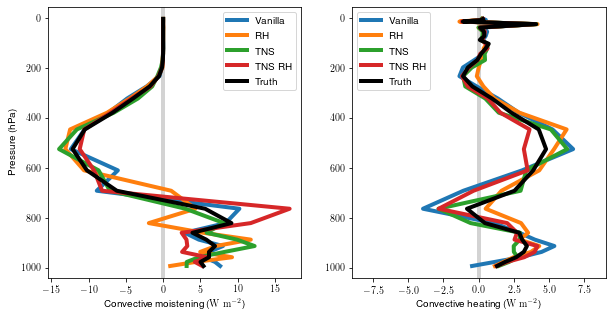

In [28]:
data = 'M4K_valid'

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.axvline(x=0,c='lightgray')
for iNN,NNs in enumerate(NNarray[:]):
    plt.plot(np.mean(diagno[NNs][data]['PHQ'],axis=(0,1,3)),lev,label=NNname[iNN])
plt.plot(np.mean(diagno['truth'][data]['PHQ'],axis=(0,1,3)),lev,label='Truth',color='k')
plt.legend()
plt.xlabel('Convective moistening ($\mathrm{W\ m^{-2}}$)')
plt.ylabel('Pressure (hPa)')
plt.gca().invert_yaxis()
#plt.xlim((-20,20))

plt.subplot(1,2,2)
plt.axvline(x=0,c='lightgray')
for iNN,NNs in enumerate(NNarray[:]):
    plt.plot(np.mean(diagno[NNs][data]['TPHYSTND'],axis=(0,1,3)),lev,label=NNname[iNN])
plt.plot(np.mean(diagno['truth'][data]['TPHYSTND'],axis=(0,1,3)),lev,label='Truth',color='k')
plt.legend()
plt.xlabel('Convective heating ($\mathrm{W\ m^{-2}}$)')
plt.gca().invert_yaxis()
plt.xlim((-9,9))


On (+4K), the brute force is terrible and the RH is already an improvement

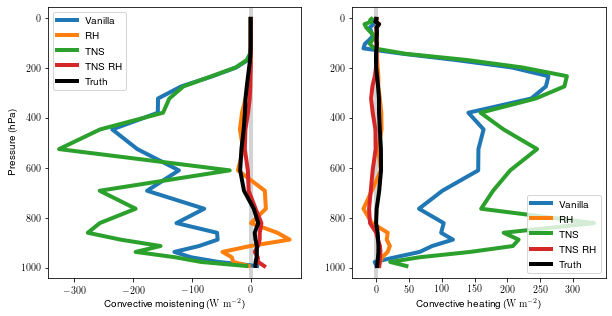

In [29]:
data = 'P4K_valid'

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.axvline(x=0,c='lightgray')
for iNN,NNs in enumerate(NNarray[:]):
    plt.plot(np.mean(diagno[NNs][data]['PHQ'],axis=(0,1,3)),lev,label=NNname[iNN])
plt.plot(np.mean(diagno['truth'][data]['PHQ'],axis=(0,1,3)),lev,label='Truth',color='k')
plt.legend()
plt.xlabel('Convective moistening ($\mathrm{W\ m^{-2}}$)')
plt.ylabel('Pressure (hPa)')
plt.gca().invert_yaxis()
#plt.xlim((-20,20))

plt.subplot(1,2,2)
plt.axvline(x=0,c='lightgray')
for iNN,NNs in enumerate(NNarray[:]):
    plt.plot(np.mean(diagno[NNs][data]['TPHYSTND'],axis=(0,1,3)),lev,label=NNname[iNN])
plt.plot(np.mean(diagno['truth'][data]['TPHYSTND'],axis=(0,1,3)),lev,label='Truth',color='k')
plt.legend()
plt.xlabel('Convective heating ($\mathrm{W\ m^{-2}}$)')
plt.gca().invert_yaxis()
#plt.xlim((-9,9))